## 4.3　回帰の例：住宅価格の予測

In [1]:
import copy
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing

#### 4.3.1　Boston Housing データセット

In [2]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [4]:
print(train_data[0])
print(train_targets[:10])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


#### 4.3.2　データの前処理を行う

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#### 4.3.3　モデルを構築する

In [6]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

#### 4.3.4　k 分割交差検証を使ってアプローチを検証する

In [7]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f'Processing fold #{i}')
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)

  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [8]:
print(all_scores)
print(np.mean(all_scores))

[2.0411922931671143, 2.423912525177002, 2.4860196113586426, 2.313870906829834]
2.316248834133148


In [9]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f'Processing fold #{i}')
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [10]:
print(len(all_mae_histories))
print(len(all_mae_histories[0]))

4
500


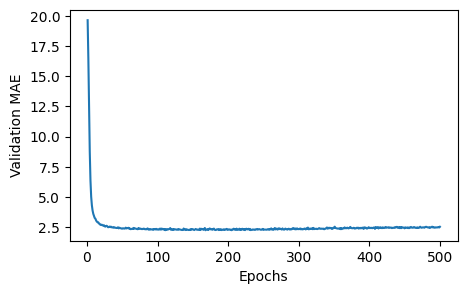

In [11]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.figure(figsize=(5, 3))
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

`x` では、エポックごとに fold 0~3 のスコアが取り出されている。

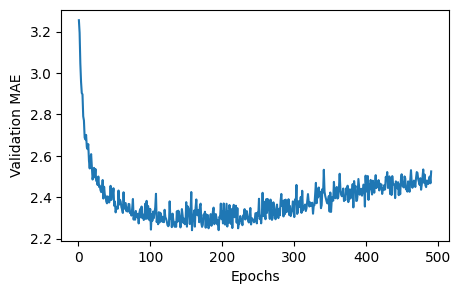

In [12]:
truncated_mae_history = average_mae_history[10:]

plt.figure(figsize=(5, 3))
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [13]:
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mae_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 16.9820 - mae: 2.7715


In [14]:
test_mae_score

2.7715003490448